In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
train_image_files_path = "../Data/dataset_image/"
valid_image_files_path = "../Data/Validation/"

In [3]:
# Đọc danh sách các thư mục trong đường dẫn train_image_files_path
label = [f for f in os.listdir(train_image_files_path) if os.path.isdir(os.path.join(train_image_files_path, f))]
# label.sort()
label

['Caloenas nicobarica nicobarica',
 'Ciconia episcopus',
 'Eretmochelys imbricata',
 'Graphium antiphates',
 'Lophura hatinhensis',
 'Lutrogale perspicillata',
 'Neofelis nebulosa',
 'Pavo muticus',
 'Phodilus badius',
 'Prionailurus viverrinus',
 'Rhincodon typus',
 'Saundersilarus saundersi',
 'Tragulus napu']

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(
    rescale=1/255,
    # rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
)
validation_data_gen = ImageDataGenerator(
    rescale=1/255,
    # rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
)

In [5]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size=(200, 200),
    class_mode='sparse'  # Use 'sparse' for integer labels
)

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(200, 200),
    class_mode='sparse'  # Use 'sparse' for integer labels
)

Found 4052 images belonging to 13 classes.
Found 1054 images belonging to 12 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
import tensorflow as tf
# Define the model
model = Sequential()

#CNN1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))

#CNN2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

#CNN3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Flatten the output
model.add(Flatten())
# Hidden layer
model.add(Dense(512, activation='relu'))
# Output layer
model.add(Dense(14, activation='softmax'))  # 14 classes, softmax for probabilities




d:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy
              metrics=['acc'])



In [8]:
# Train the model for 100 epochs, with 3 steps per epoch
EPOCHS = 100
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=3,  # Set steps_per_epoch to 3
    validation_data=validation_generator
)


Epoch 1/100


d:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 90s 35s/step - acc: 0.0833 - loss: 4.1320 - val_acc: 0.0949 - val_loss: 4.6175
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 10s/step - acc: 0.1745 - loss: 3.7718 - val_acc: 0.0721 - val_loss: 2.6509
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 10s/step - acc: 0.2435 - loss: 2.4924 - val_acc: 0.0721 - val_loss: 2.7862
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 10s/step - acc: 0.1823 - loss: 2.3751 - val_acc: 0.1120 - val_loss: 2.9401
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 11s/step - acc: 0.2565 - loss: 2.2032 - val_acc: 0.1698 - val_loss: 3.0769
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 10s/step - acc: 0.3281 - loss: 1.8978 - val_acc: 0.1233 - val_loss: 3.2656
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 11s/step - acc: 0.3776 - loss: 1.9880 - val_acc: 0.2277 - val_loss: 3.6572
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 11s/step - acc: 0.4719 - loss: 1.7904 - val_acc: 0.1917 - val_loss: 4.5733
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 11s/step - acc: 0.3685 - loss: 1.8000 - val

d:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 20s/step - acc: 0.7500 - loss: 0.7211 - val_acc: 0.4345 - val_loss: 3.9877
Epoch 44/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 70s 26s/step - acc: 0.6745 - loss: 1.2174 - val_acc: 0.4307 - val_loss: 3.5887
Epoch 45/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 50s 25s/step - acc: 0.6888 - loss: 0.9870 - val_acc: 0.4213 - val_loss: 3.7292
Epoch 46/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 39s 19s/step - acc: 0.6055 - loss: 1.2784 - val_acc: 0.3435 - val_loss: 3.8214
Epoch 47/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 50s 24s/step - acc: 0.6719 - loss: 0.9958 - val_acc: 0.3738 - val_loss: 3.0529
Epoch 48/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 47s 23s/step - acc: 0.7604 - loss: 0.7807 - val_acc: 0.3691 - val_loss: 2.9070
Epoch 49/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 47s 23s/step - acc: 0.6797 - loss: 0.9309 - val_acc: 0.4004 - val_loss: 3.0340
Epoch 50/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 15s/step - acc: 0.7057 - loss: 0.9061 - val_acc: 0.4583 - val_loss: 3.2415
Epoch 51/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 11s/step - acc: 0.8060 - loss: 0.55

In [9]:
# Lưu model sau khi huấn luyện
model.save("trained_animal_model.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


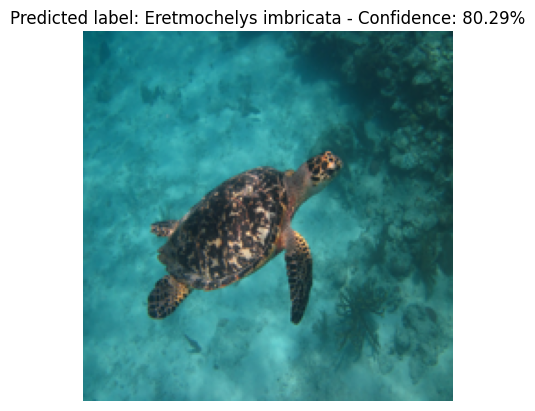

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Hàm dự đoán
def predict_image(image_path):
    # Load ảnh và chuyển đổi về đúng định dạng
    model = load_model("./trained_animal_model.keras")
    img = Image.open(image_path)
    img = img.resize((200, 200))
    img_array = np.array(img) / 255.0  # Rescale về 0-1

    # Thêm một chiều cho batch
    img_array = np.expand_dims(img_array, axis=0)

    # Dự đoán
    predictions = model.predict(img_array)
    predicted_label = label[np.argmax(predictions)]
    confidence = np.max(predictions) * 100  # Độ chính xác trong phần trăm

    # Hiển thị ảnh và kết quả dự đoán
    plt.imshow(img)
    plt.title(f'Predicted label: {predicted_label} - Confidence: {confidence:.2f}%')
    plt.axis('off')
    plt.show()

file_path = '../Data/Testing/Eretmochelys imbricata/IMG_1023.jpg'
predict_image(file_path)

